There are plenty of helpful resources available online to study and understand Simple Linear Regression (SLR). One resource I find particularly useful and to the point is this article by DataCamp: https://www.datacamp.com/tutorial/simple-linear-regression. For intuitive explanations, I personally follow the CampusX videos on YouTube.

In this notebook, I aim to visualize and understand the assumptions of Simple Linear Regression. 

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-bill-prediction/electricity_bill.csv


In [17]:
df = pd.read_csv("/kaggle/input/electricity-bill-prediction/electricity_bill.csv")
df

,Units_Consumed,Electricity_Bill
0,152,1010.93
1,485,3861.19
2,398,3210.64
3,320,2678.67
4,156,1239.04
...,...,...
495,199,1640.91
496,363,2577.80
497,107,1047.46
498,391,2989.52


In [18]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

## Assumptions of Simple Linear Regression  

### 1. Linear Relationship
Before fitting the model, we must check if the independent and dependent variables exhibit a linear relationship. If the relationship is non-linear, the model won’t capture it well.

To check this assumption, we can plot a scatter plot of the dependent variable against the independent variable.


<Axes: xlabel='Units_Consumed', ylabel='Electricity_Bill'>

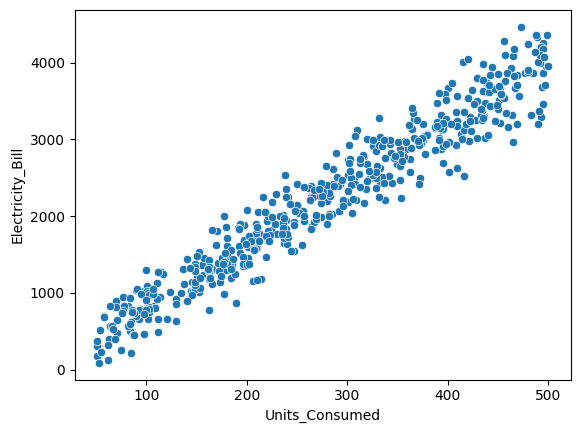

In [23]:
import seaborn as sns
sns.scatterplot(x='Units_Consumed', y='Electricity_Bill', data=df)

From the scatter plot, we can see that the data exhibits a linear trend. But this is just the first step, there are other assumptions we need to validate.

### 2. Homoscedasticity of Residuals
Homoscedasticity means that the residuals (errors) have constant variance across all independent variable levels. If this assumption is violated, the model may perform poorly in some data regions.


In [24]:
residuals = y_test - y_pred


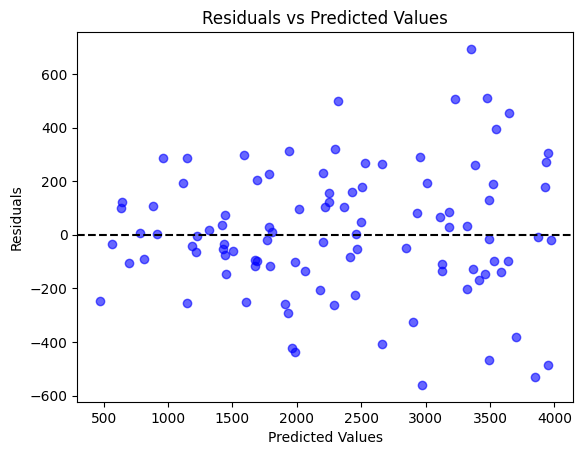

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


The residuals are scattered evenly around the horizontal line at zero, indicating a constant variance. Thus, this assumption holds true for our data.

### 3. Normality of Residuals (or Errors)
The residuals should follow a normal distribution. This assumption ensures that hypothesis tests and confidence intervals for coefficients are valid.

We can validate this assumption either by plotting a histogram or by a QQ plotor maybe both. 

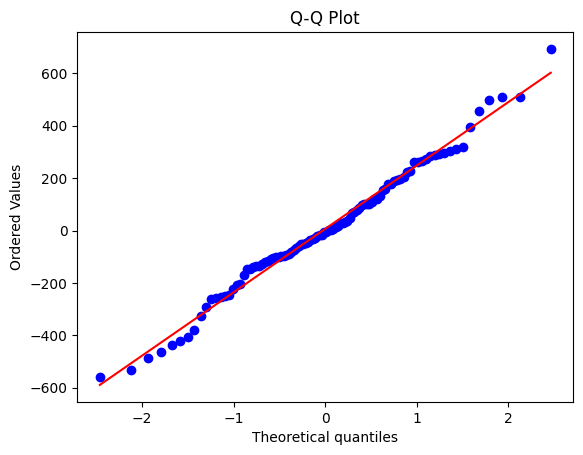

In [26]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


The Q-Q plot shows that the residuals follow an almost normal distribution, with minor deviations at the extremes.

### 4. Independence of Errors

Residuals should not be correlated with one another. This means that the error for one observation should not influence the error of another observation.

In [27]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 1.9931283646137965


The value 1.99 is very close to 2, suggesting no autocorrelation. Hence, we can say that residuals are independent.

I have visualized and validated the key assumptions of Simple Linear Regression. Ensuring these assumptions hold true is critical for building a reliable model and ensuring model’s performance is robust and interpretable.